#### Installing the Data from Kaggle

In [0]:
#!pip install kaggle


# Accessing Kaggle Token API to access Public Dataset
#import json

#token = {"username":"kushalvala","key":"xxxxxxxxxx"}
#with open('/root/.kaggle/kaggle.json', 'w') as file:
#    json.dump(token, file)

#!chmod 600 /root/.kaggle/kaggle.json

#!kaggle config set -n path -v{/content}

#!kaggle datasets download -d puneet6060/intel-image-classification -p /content

#!unzip \*.zip

In [0]:
# Importing necessary libraries

import tensorflow as tf
import os

In [0]:
# Analysis on the number of images in each category 

train_buildings = os.path.join('/content/seg_train/seg_train/buildings')
train_forest = os.path.join('/content/seg_train/seg_train/forest')
train_glacier = os.path.join('/content/seg_train/seg_train/glacier')
train_mountain =os.path.join('/content/seg_train/seg_train/mountain')
train_sea = os.path.join('/content/seg_train/seg_train/sea')
train_street = os.path.join('/content/seg_train/seg_train/street')

In [10]:
print('Total training Buildings detected images:', len(os.listdir(train_buildings)))
print('Total training Forest detected images:', len(os.listdir(train_forest)))
print('Total training Glacier detected images:', len(os.listdir(train_glacier)))
print('Total training Mountain detected images:', len(os.listdir(train_mountain)))
print('Total training Sea detected images:', len(os.listdir(train_sea)))
print('Total training Street detected images:', len(os.listdir(train_street)))

Total training Buildings detected images: 2191
Total training Forest detected images: 2271
Total training Glacier detected images: 2404
Total training Mountain detected images: 2512
Total training Sea detected images: 2274
Total training Street detected images: 2382


Creating a Data Generator's for Train and Test Data

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/seg_train/seg_train/' 
VAL_DIR = '/content/seg_pred/seg_pred/'
TEST_DIR = '/content/seg_test/seg_test/'

# Image Augumentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [51]:
# Specifying the directory structure to the generator object.

train_generator = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(150,150),
    batch_size = 128,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


AlexNet - Model Building

In [0]:
model = tf.keras.models.Sequential(
    [
     # 1st Convolutional Layer
     tf.keras.layers.Conv2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11), strides=(4,4), padding='valid', activation= 'relu'),
     tf.keras.layers.MaxPooling2D(pool_size=(3,3) , strides=(2,2) , padding= 'valid'),
     # 2nd Convolutional Layer
     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding= 'same' , activation= 'relu'),
     tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2) , padding='valid'),
     # 3rd Convolutional Layer
     tf.keras.layers.Conv2D(filters=384 , kernel_size=(3,3) , padding= 'valid', activation='relu'),
     tf.keras.layers.Conv2D(filters=384 , kernel_size=(3,3) , padding= 'valid', activation='relu'),
     tf.keras.layers.Conv2D(filters=256 , kernel_size=(3,3) , padding= 'valid', activation='relu'),
     # Flatten Layer- Dense Network 
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(4096, activation='relu'),
     tf.keras.layers.Dropout(0.4),
     tf.keras.layers.Dense(4096, activation='relu'),
     tf.keras.layers.Dropout(0.4),
     # Softmax Output
     tf.keras.layers.Dense(6, activation='softmax')
    ]
)

In [57]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 2, 2, 256)       

In [0]:
from tensorflow.keras.optimizers import RMSprop,SGD

model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

In [62]:
# Training
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  
      epochs=100,
      verbose=1,
      validation_data = test_generator,
      validation_steps=10)

Epoch 1/100
10/10 [==============================] - 10s 958ms/step - loss: 9.2465 - acc: 0.2023 - val_loss: 1.7414 - val_acc: 0.2711
Epoch 2/100
10/10 [==============================] - 8s 798ms/step - loss: 1.7171 - acc: 0.2383 - val_loss: 1.7215 - val_acc: 0.2313
Epoch 3/100
10/10 [==============================] - 8s 793ms/step - loss: 1.7138 - acc: 0.2344 - val_loss: 1.7198 - val_acc: 0.1969
Epoch 4/100
10/10 [==============================] - 8s 795ms/step - loss: 1.6512 - acc: 0.2586 - val_loss: 1.5336 - val_acc: 0.2898
Epoch 5/100
10/10 [==============================] - 8s 760ms/step - loss: 1.4649 - acc: 0.3476 - val_loss: 1.4060 - val_acc: 0.3562
Epoch 6/100
10/10 [==============================] - 8s 790ms/step - loss: 1.4049 - acc: 0.3617 - val_loss: 1.3675 - val_acc: 0.3758
Epoch 7/100
10/10 [==============================] - 8s 807ms/step - loss: 1.3695 - acc: 0.3898 - val_loss: 1.2908 - val_acc: 0.4313
Epoch 8/100
10/10 [==============================] - 8s 805ms/step -

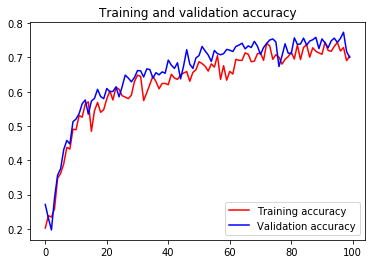

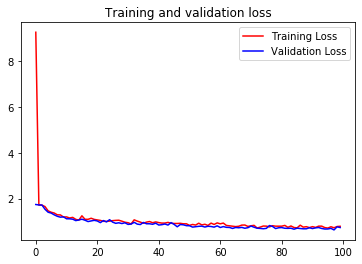

In [63]:
# Plotting Validation and Train Set Accuracy and Loss

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()